In [27]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt

In [41]:
races = pd.read_csv("data/data_train.csv", names=["Age", "LastRun", "Bends", "Remarks", "Finishes", "SP", "Weight", "Ratio", "Result"])

In [42]:
races.head()

,Age,LastRun,Bends,Remarks,Finishes,SP,Weight,Ratio,Result
0,799,11,0.5500,0.3000,0.7500,3.8000,32.5,1.4955,0
1,1097,5,0.7000,0.3600,1.1200,5.3160,34.3,0.4270,0
2,770,7,-0.1818,0.4545,0.9545,2.6761,25.3,-0.2377,0
3,1446,7,1.2424,0.2273,1.4242,4.4924,31.8,-0.0829,1
4,1159,7,0.8857,0.0857,1.0286,4.7429,37.2,-0.2389,1


<Figure size 1080x1080 with 0 Axes>

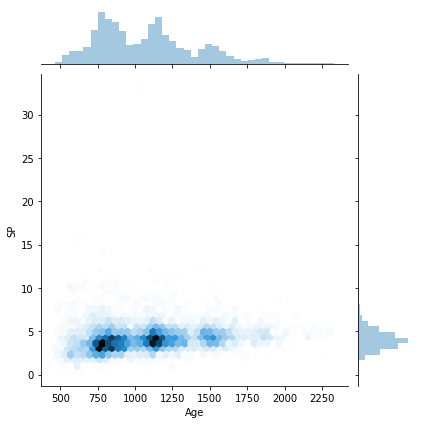

In [54]:
plt.figure(figsize=(15,15))
sns.jointplot(x="Age",y="SP", data=races, kind="hex")